### Домашнее задание №1 Создание и нормализация базы данных 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-mcfe{background-color:#F9F8FA;color:#181818;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-4bv2{background-color:#FFF;color:#181818;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-rpr9{background-color:#F9F8FA;color:#313131;font-weight:bold;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-4bv2"><span style="font-weight:bold">Тема домашней работы</span></th>
    <th class="tg-4bv2"><span style="font-weight:600;color:#181818">Создание и нормализация базы данных.</span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-mcfe"><span style="font-weight:bold">Цель домашней работы</span></td>
    <td class="tg-mcfe"><span style="font-weight:600;color:#181818">Научиться создавать базы данных и нормализовать их.</span></td>
  </tr>
  <tr>
    <td class="tg-4bv2"><span style="font-weight:bold">Формулировка задания</span></td>
    <td class="tg-4bv2"><span style="font-weight:600;color:#181818">Дан файл с данными по клиентам и транзакциям:</span> <a href="https://lms.skillfactory.ru/asset-v1:SkillFactory+MFTIDS+SEP2023+type@asset+block@customer_and_transaction__2_.xlsx"><span style="font-weight:inherit;font-style:inherit;text-decoration:none;color:#0075B4">customer_and_transaction.xlsx</span></a><span style="font-weight:600;color:#181818">.</span><br><span style="font-weight:bold">Необходимо выполнить следующие пункты:</span><br><span style="font-weight:bold">(2 балла)</span> Продумать структуру базы данных и <a href="https://dbdiagram.io/home?utm_source=holistics&utm_medium=top_5_tools_blog"><span style="font-weight:inherit;font-style:inherit;text-decoration:none;color:#0075B4">отрисовать в редакторе</span></a>.<br><span style="font-weight:bold">(2 балла)</span> Нормализовать базу данных (1НФ — 3НФ), описав, к какой нормальной форме приводится таблица и почему таблица в этой нормальной форме изначально не находилась.<br><span style="font-weight:bold">(3 балла)</span> Создать все таблицы в DBeaver, указав первичные ключи к таблицам, правильные типы данных, могут ли поля быть пустыми или нет (использовать команду CREATE TABLE).<br><span style="font-weight:bold">(3 балла)</span> Загрузить данные в таблицы в соответствии с созданной структурой (использовать команду INSERT INTO или загрузить файлы, используя возможности инструмента DBeaver; в случае загрузки файлами приложить скрины, что данные действительно были залиты).</td>
  </tr>
  <tr>
    <td class="tg-mcfe"><span style="font-weight:bold">Обратите внимание</span></td>
    <td class="tg-rpr9">В итоге количество таблиц может отличаться от количества листов в Excel.<br>Можно загрузить не все данные, а какую-то маленькую выборку для быстроты и удобства.</td>
  </tr>
  <tr>
    <td class="tg-4bv2"><span style="font-weight:bold">Как отправить задание на проверку</span></td>
    <td class="tg-4bv2"><span style="font-weight:600;color:#181818">Загрузите файл(ы) в GitHub, в форму приложите ссылку на него. Назовите файл(ы) вашим ФИО.</span></td>
  </tr>
  <tr>
    <td class="tg-mcfe"><span style="font-weight:bold">Что нужно отправить</span></td>
    <td class="tg-rpr9">Ссылку на репозиторий, в котором будут ноутбук в Jupyter с решением или sql-скрипты на PostgreSQL со скринами из DBeaver.<br>Скрин базы данных с пункта 1 и описание с пункта 2 можно отправить отдельным документом или же вставить в ноутбук в начале работы.</td>
  </tr>
</tbody>
</table>

## Решение: 

### Исходные данные:

Изначально в исходном документе Excel были даны две таблицы со следующими колонками:

Таблица transactions:

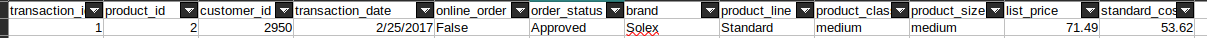

Таблица customers:
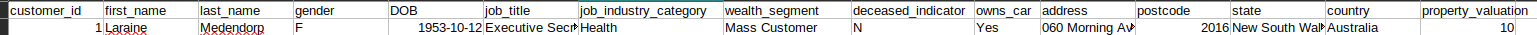

### Проектирование базы данных

Исходные таблицы можно предствить в виде следующей диаграммы:

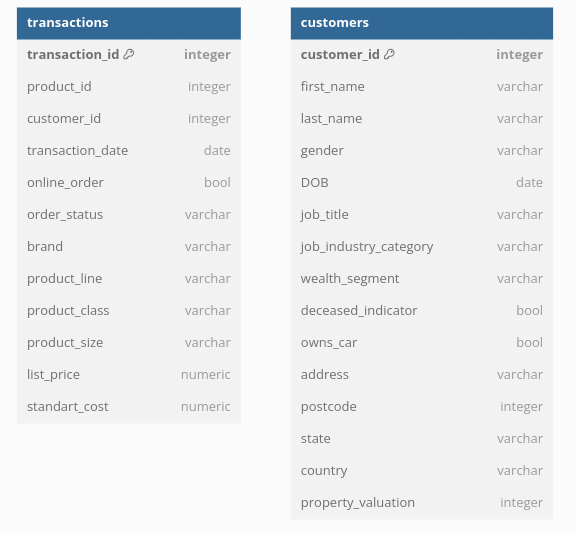

---
##### Проверим соответствие данной базы данных условиям **1й Нормальной формы (НФ)**


- Каждая ячейка таблицы должна содержать одно значение.
- Каждая запись должна быть уникальной.
- Каждая колонка/столбец должна иметь уникальное имя

<div style="background-color: #e0fff3; padding: 15px; color: black; width: 80%;">  При исследовании данных в Excel не было обнаружено составных данных в ячейках/столбцах. Обе таблицы имеют потенциальные первичные ключи, которые могут гарантированно идентифицировать каждую строку.
Однако, в колонке gender таблицы customers было замечено неунифированные значения в ячейках, а именно: два гендера (мужской и женский) были названы не одинаково.</div>

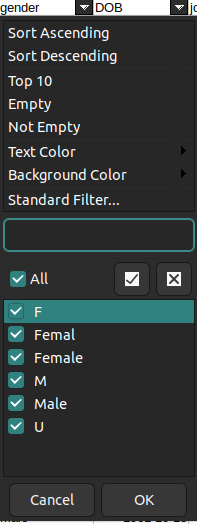

Хранение эквивалентных значений в требованиях 1НФ не описывается во многих источниках. Однако в [данной статье](https://www.ionos.com/digitalguide/hosting/technical-matters/database-normalization/) данное требование упоминается как одним из требований к 1НФ.
- All table columns contain identical values 

Для устранения этого замечания было решено унифицировать значения уже изначально в Excel документе.

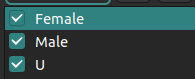

После этого мы можем заявить, что данная структура базы данных находится в первой нормальной форме.

---
##### Проверим соответствие данной базы данных условиям **2й Нормальной формы (НФ)**

- Быть в 1НФ
- Все неключевые столбцы *неприводимо* зависят от каждого потенциального (candidate) ключа[[``]](https://ru.wikipedia.org/wiki/Вторая_нормальная_форма)

<div style="background-color: #f5f5f5; padding: 15px; color: black; width: 80%;">Неприводимость означает, что в составе потенциального ключа отсутствует меньшее подмножество атрибутов, от которого можно также вывести данную функциональную зависимость. Для неприводимой функциональной зависимости часто используется эквивалентное понятие «полная функциональная зависимость».

Если потенциальный ключ является простым, то есть состоит из единственного атрибута, то любая функциональная зависимость от него является неприводимой (полной). Если потенциальный ключ является составным, то, согласно определению второй нормальной формы, в отношении не должно быть неключевых атрибутов, зависящих от части составного потенциального ключа.</div>

В таблицах transaction и customers первичные ключи представлены из одного аттрибута (transaction_id, customer_id), вследствие этого нет столбцов, которые зависят только от части составного ключа. 
Таким образом, можно считать, что при наличии простого (несоставного) первичного ключа и при удовлетворении условиям 1НФ, база данных (таблица) переходит в 2НФ. 

---
##### Проверим соответствие данной базы данных условиям **3й Нормальной формы (НФ)**

- Быть во 2НФ
- ни один неключевой атрибут не находится в транзитивной функциональной зависимости от потенциального (candidate) ключа.[[``]](https://ru.wikipedia.org/wiki/Третья_нормальная_форма)

<div style="background-color: #e0fff3; padding: 15px; color: black; width: 80%;">  В таблице transactions столбцы list_price, standard_cost зависят от комбинации столбцов product_id, brand, product_line, product_class, product_size, которые не являются ключом-кандидатом и в свою очередь зависят от первичного ключа transaction_id, тем самым list_price, standard_cost транзитивно зависят от первичного ключа transaction_id.</div>

Следовательно для приведения в 3НФ необходимо произвести декомпозицию таблицы transactions, создав еще одну таблицу products, куда будут вынесены соответствующие столбцы описывающие продукт, указанный в транзакции.

В таблице customers_id не найдено транзитивных связей.

Создадим новую таблицу products с суррогатным ключом id (т.к. атрибут product_id не обеспечивает уникальность каждого продукта). Создадим связи между таблицами customers, transactions и products.

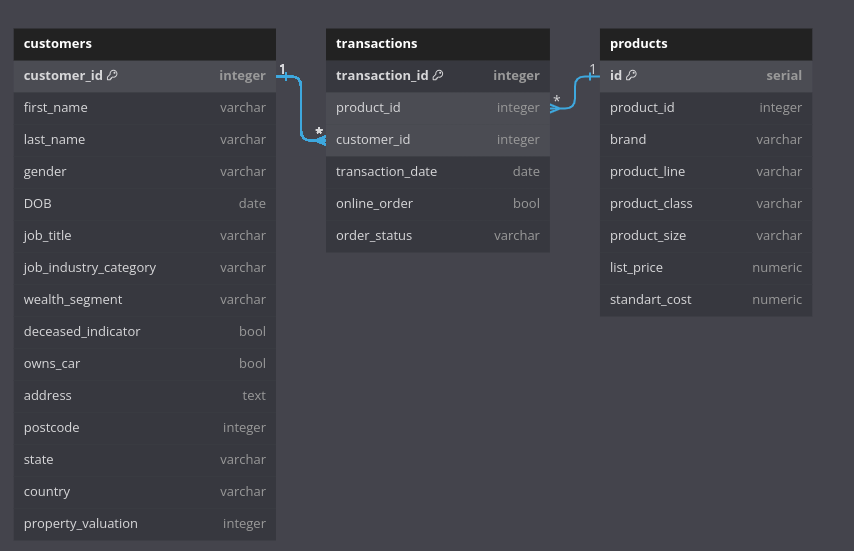

Теперь все таблицы находятся в 3НФ.

---
##### Создание базы данных в PostgreSQL при помощи DBeaver

1. Создадим базу данных:

```
create database store;

2. Создадим таблицы:

2.1. Таблица о покупателях 

```
create table customers
(customer_id integer primary key
,first_name varchar(20)
,last_name varchar(25)
,gender varchar(10)
,DOB date
,job_title varchar(50)
,job_industry_category varchar(20)
,wealth_segment varchar(10)
,deceased_indicator bool
,owns_car bool
,address text
,postcode integer
,state varchar(20)
,country varchar(20));

2.2. Таблица продуктов

```
create table products
(id serial primary key
,product_id integer
,brand varchar(20)
,product_line varchar(20)
,product_class varchar(10)
,product_size varchar(10)
,list_price numeric
,standard_cost numeric);

2.3. Таблица транзакций

```
create table transactions
(transaction_id integer primary key
,product_id integer
,customer_id integer
,transaction_date date
,online_order bool
,order_status varchar(15)
,foreign key(product_id) references products (id)
,foreign key (customer_id) references customers (customer_id));

---
##### Подготовка csv файла с данными таблиц